# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\vikto\Desktop\Data_Visualization_Challenge\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\vikto\Desktop\Data_Visualization_Challenge\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined_Data = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
print(Combined_Data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [6]:
# Checking the number of mice.
Number_of_mice = Combined_Data["Mouse ID"].nunique()
Number_of_mice

249

In [9]:
# Get the duplicate entries based on Mouse ID and Timepoint
Duplicates = Combined_Data[Combined_Data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get a summary of duplicates
duplicate_summary = Duplicates.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='Counts')

print("Summary of duplicate entries:")
print(duplicate_summary)


Summary of duplicate entries:
  Mouse ID  Timepoint  Counts
0     g989          0       2
1     g989          5       2
2     g989         10       2
3     g989         15       2
4     g989         20       2


In [4]:
# Optional: Get all the data for the duplicate mouse ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Identify the Mouse IDs that have duplicates
duplicate_mouse_ids = Duplicates['Mouse ID'].unique()

# Filter the Combined_Data DataFrame to include only rows with these Mouse IDs
all_data_for_duplicates = Combined_Data[Combined_Data['Mouse ID'].isin(duplicate_mouse_ids)]

print("All data for duplicate Mouse IDs:")
print(all_data_for_duplicates)


All data for duplicate Mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Fem

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Assuming the tumor volume column is named 'Tumor Volume (mm3)' and regimen column is 'Drug Regimen'

# Generate summary statistics for tumor volume by drug regimen
summary_stats = Combined_Data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    'mean', 
    'median', 
    'var',  # Variance
    'std',  # Standard deviation
    lambda x: st.sem(x)  # Standard error of the mean
]).reset_index()

# Rename the columns for clarity
summary_stats.columns = [
    'Drug Regimen', 
    'Mean Tumor Volume', 
    'Median Tumor Volume', 
    'Variance Tumor Volume', 
    'Standard Deviation Tumor Volume', 
    'SEM Tumor Volume'
]

print("Summary statistics of tumor volume by regimen:")
print(summary_stats)


Summary statistics of tumor volume by regimen:
  Drug Regimen  Mean Tumor Volume  Median Tumor Volume  Variance Tumor Volume  \
0    Capomulin          40.675741            41.557809              24.947764   
1     Ceftamin          52.591172            51.776157              39.290177   
2    Infubinol          52.884795            51.820584              43.128684   
3     Ketapril          55.235638            53.698743              68.553577   
4     Naftisol          54.331565            52.509285              66.173479   
5      Placebo          54.033581            52.288934              61.168083   
6     Propriva          52.322552            50.854632              42.351070   
7     Ramicane          40.216745            40.673236              23.486704   
8     Stelasyn          54.233149            52.431737              59.450562   
9    Zoniferol          53.236507            51.818479              48.533355   

   Standard Deviation Tumor Volume  SEM Tumor Volume  
0     

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

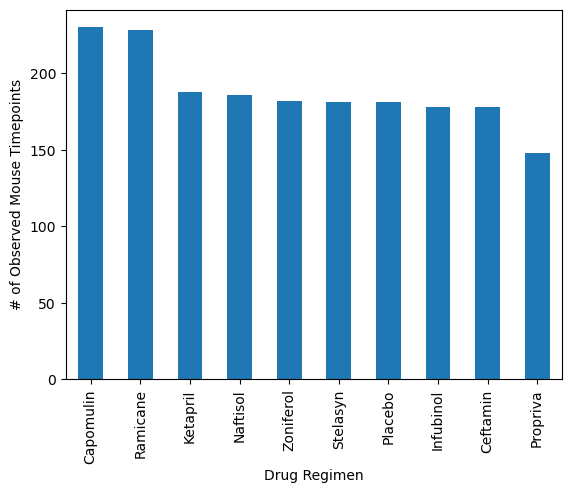

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
cities = ["San Francisco", "Omaha", "New Orleans", "Cincinnati", "Pittsburgh"]
cars_in_cities = [214.7, 564.4, 416.5, 466.7, 350.6]
x_axis = np.arange(len(cars_in_cities))

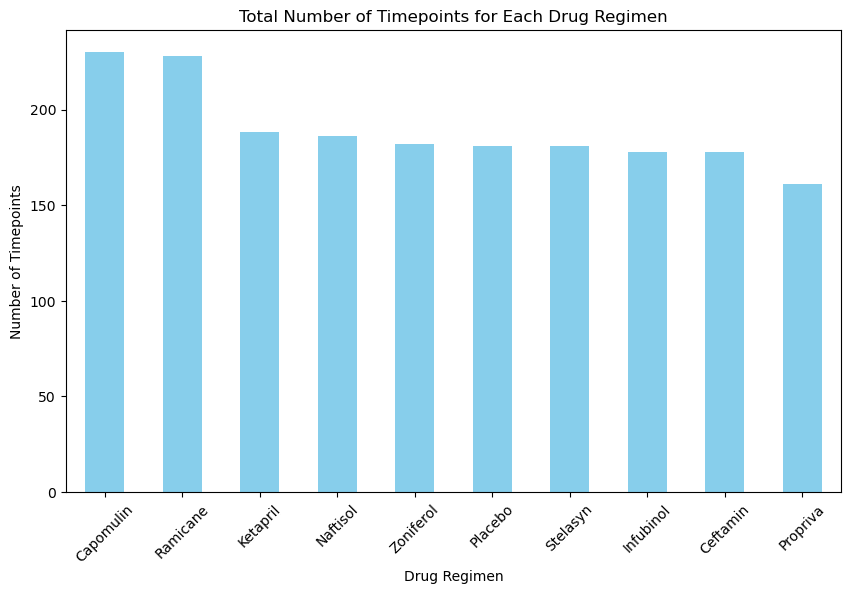

In [4]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import pandas as pd
import matplotlib.pyplot as plt

# Load data
mouse_metadata_path = r"C:\Users\vikto\Desktop\Data_Visualization_Challenge\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\vikto\Desktop\Data_Visualization_Challenge\Pymaceuticals\data\Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge datasets
Combined_Data = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Count the number of rows (timepoints) for each drug regimen
regimen_counts = Combined_Data['Drug Regimen'].value_counts()

# Plot using Pandas
regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)
plt.show()


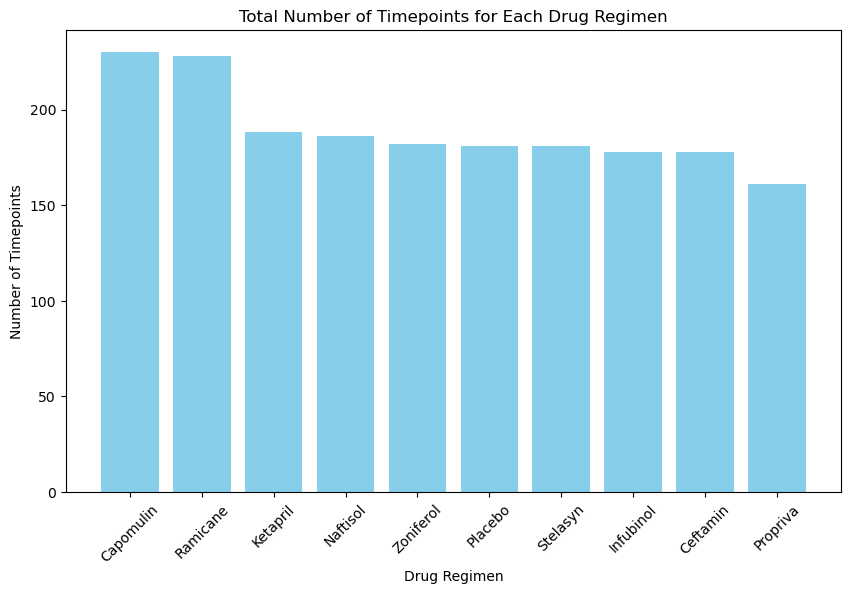

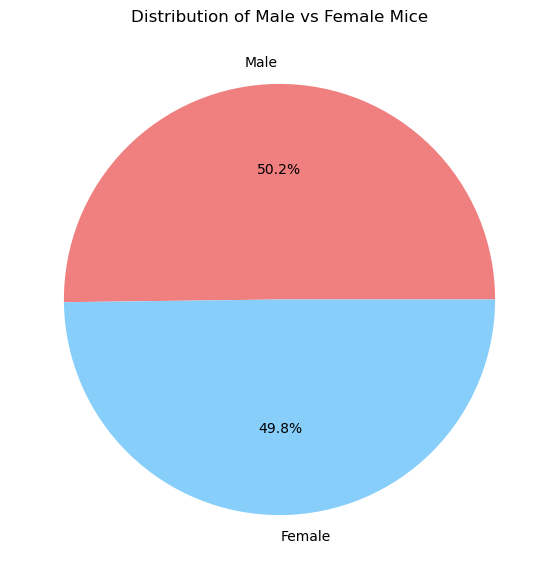

In [5]:
import matplotlib.pyplot as plt

# Plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)
plt.show()

# Get the unique mice with their gender
unique_mice = Combined_Data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of each gender
gender_counts = unique_mice['Sex'].value_counts()

# Plot pie chart using Pandas
gender_counts.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], title='Distribution of Male vs Female Mice')
plt.ylabel('')  # Hide y-label
plt.show()


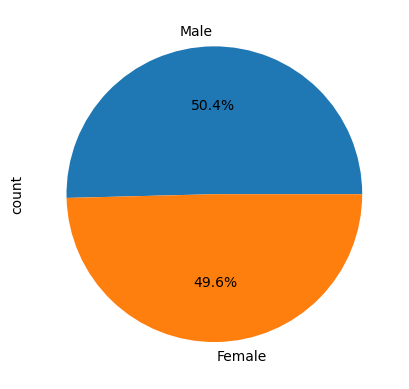

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [13]:

# List of regimens to analyze
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter Combined_Data for the selected regimens
filtered_data = Combined_Data[Combined_Data['Drug Regimen'].isin(regimens)]

# Get the last timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge to get the tumor volume at the last timepoint
last_timepoints = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'])




In [14]:

# Prepare data for plotting
regimen_data = {}
for regimen in regimens:
    regimen_data[regimen] = last_timepoints[last_timepoints['Drug Regimen'] == regimen]['Tumor Volume (mm3)']

# Calculate IQR and detect outliers
outliers = {}
for regimen, volumes in regimen_data.items():
    q1 = volumes.quantile(0.25)
    q3 = volumes.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[regimen] = volumes[(volumes < lower_bound) | (volumes > upper_bound)]

print("\nOutliers for each regimen:")
for regimen, outlier_data in outliers.items():
    print(f"{regimen}:")
    print(outlier_data)


Outliers for each regimen:
Capomulin:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [6]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Treatment', y='Tumor Volume', data=df)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume')
plt.xticks(rotation=45)  # Rotate x labels if needed for better readability
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

## Line and Scatter Plots

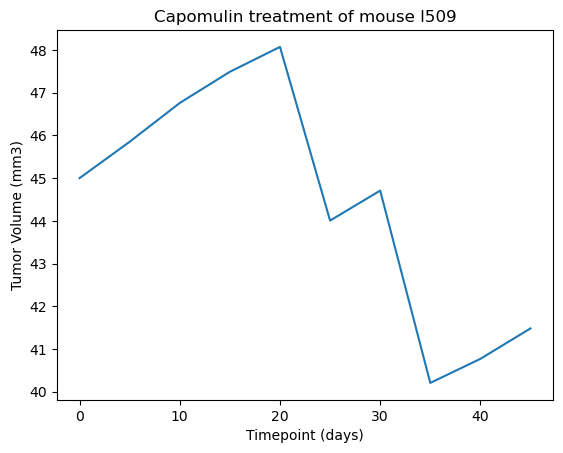

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data for a specific mouse treated with Capomulin
mouse_id = 'l509'  # Replace with the Mouse ID you are interested in
mouse_data = Combined_Data[(Combined_Data['Mouse ID'] == mouse_id) & (Combined_Data['Drug Regimen'] == 'Capomulin')]

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume'], marker='o', linestyle='-', color='b')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


In [7]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for Capomulin regimen
capomulin_data = Combined_Data[Combined_Data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume'].mean().reset_index()

# Merge with mouse metadata to get weight information
mouse_weights = mouse_metadata[['Mouse ID', 'Weight (g)']]
merged_data = pd.merge(avg_tumor_volume, mouse_weights, on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume'], marker='o', color='r')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume'])
print(f'Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume'])

# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume'], marker='o', color='r', label='Data points')
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='b', label='Regression line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen with Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'Column not found: Tumor Volume'

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


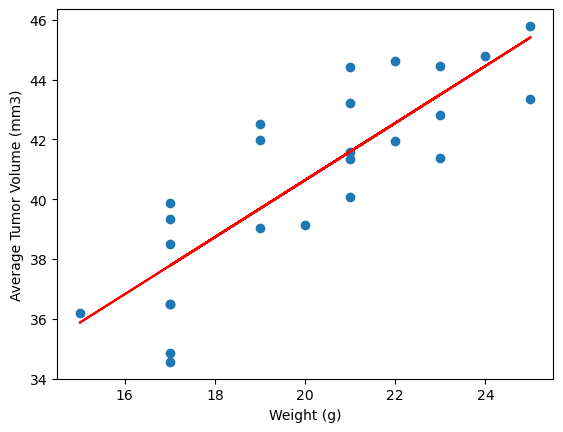

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
